In [57]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [58]:
diabetes=datasets.load_diabetes()

In [59]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [60]:
diabetes.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, T-Cells (a type of white blood cells)\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, thyroid stimulating hormone\n      - s5      ltg, lamotrigine\n      - s6      glu, blood sugar level\n\nNo

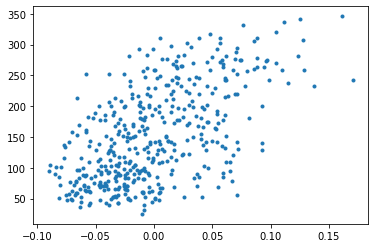

In [61]:
X_p=diabetes.data[:,2] # 혈압
X_d = diabetes.target # 당뇨 진행 정도
X = [X_p,X_d]
plt.plot(X_p,X_d,'.')

# Diabetes (clustering)

### 위의 당뇨 데이터의 혈압, 당뇨진행 정도 데이터를 이용하여 군집화(clustering)하여라.

#### 1. 나만의 코드

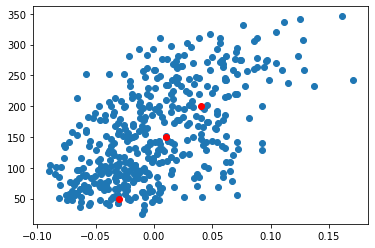

In [62]:
X = [X_p,X_d]
plt.scatter(X[0],X[1])
plt.plot([-0.03],[50],'ro')
plt.plot([0.01],[150],'ro')
plt.plot([0.04],[200],'ro')

In [63]:
temp=[]
for (i,j) in zip(X[0],X[1]):
    r1=(i-(-0.02))**2 + (j-50)**2
    r2=(i-(0.05))**2 + (j-200)**2
    r3=(i-0.1)**2 + (j-270)**2
    m=min(r1,r2,r3)
    temp.append([r1,r2,r3].index(m))


In [64]:
x1=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==0)])
x2=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==1)])
x3=np.transpose([[i,j] for (t,i,j) in zip(temp,X[0],X[1]) if(t==2)])
r1=np.mean(x1[0]),np.mean(x1[1])
r2=np.mean(x2[0]),np.mean(x2[1])
r3=np.mean(x3[0]),np.mean(x3[1])

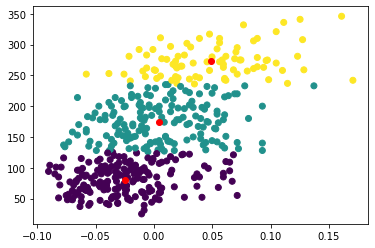

In [65]:
plt.scatter(X[0],X[1],c=temp)
plt.plot(r1[0],r1[1],'ro')
plt.plot(r2[0],r2[1],'ro')
plt.plot(r3[0],r3[1],'ro')

#### 2. sklearn 이용

In [66]:
from sklearn.cluster import KMeans

In [67]:
kmeans = KMeans(n_clusters = 3)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=3)

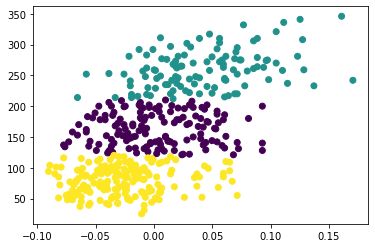

In [68]:
plt.scatter(X[0],X[1],c=kmeans.labels_)

#### 3. cluster 수를 결정하는 좋은 방법을 고안하여 적용해보아라.

## 엘보우 기법 
#### km.inertia_가 k-means 클러스터링으로 계산된 SSE 값
#### 클러스터의 개수를 늘리면서 SEE(오차의 제곱 합)기법으로 그래프를 그린다.

In [69]:
kmeans.inertia_

296608.4039764498

In [70]:
kiner = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    kiner[k] = kmeans.inertia_

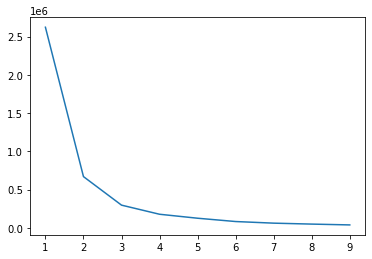

In [71]:
plt.plot(list(kiner.keys()), list(kiner.values()))

In [72]:
kmeans = KMeans(n_clusters = 5)
data = np.transpose(X)
kmeans.fit(data)

KMeans(n_clusters=5)

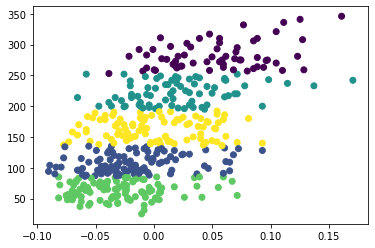

In [73]:
plt.scatter(X[0],X[1],c=kmeans.labels_)